In [1]:
# y = mx+b (simple line equation)

In [2]:
# optimizing is a backbone of ml : to predict the models of ml
# delhi - jaipur = 300 km (losss function in ml)


In [3]:
# loss = y(actual) - y(prediction)
# loss = (mx+b) - (mxi+bi)
# loss = 1/n(mx + b - mxi - bi)**2 loss fwith respect to mean squared

In [4]:
# n= 1
# Loss = (y - mxi-b)**2
# d(loss)/d(b) = 2(y-mxi-b).(1)= -2(y-mxi-b)


In [5]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_regression 

# n_samples = 4 : This specifies the number of samples(rows) in the dataset. In this case, the datasets will have four rows

n_features = 1: This specifies the number of features(columns) in the dataset. In this case , the dataset will have one feature column 
    

n_informative = 1: This specifes the number of informative features in the dataset. Informative features are those that are used to generate the target variable ,\. In this case, there is only one informative feature column

 n_targets =1: This specifes the number of targets variables in the datasets . In this case, there is only target variables

 noise = 80: This specifes the amount of noise to add to the target variables .

In [6]:
x,y = make_regression(n_samples = 4 , n_features =1 , n_informative =1 , n_targets = 1,
                     noise =80,random_state=13)

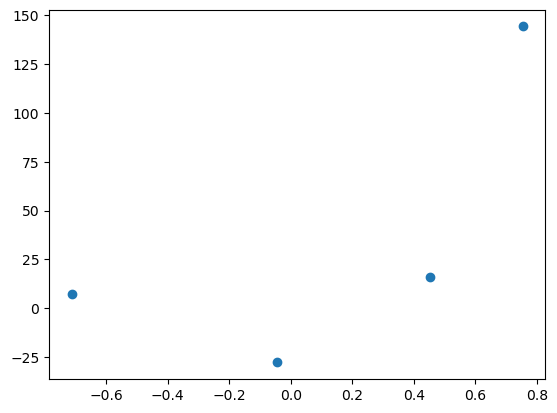

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [9]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [13]:
LinearRegression(copy_X = True , fit_intercept = True, n_jobs = None)

LinearRegression()

In [14]:
reg.coef_

array([78.35063668])

In [15]:
reg.intercept_

26.15963284313262

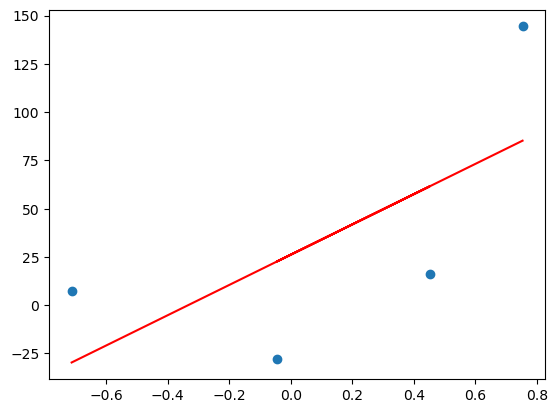

In [18]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x) , color ='red')

In [20]:
# Let's apply Gradient Descent assuming slope is constant = 78.35
# and let's assume the starting value for intercept b=0
y_pred =((78.35*x)+0).reshape(4)  #y = m*x+b

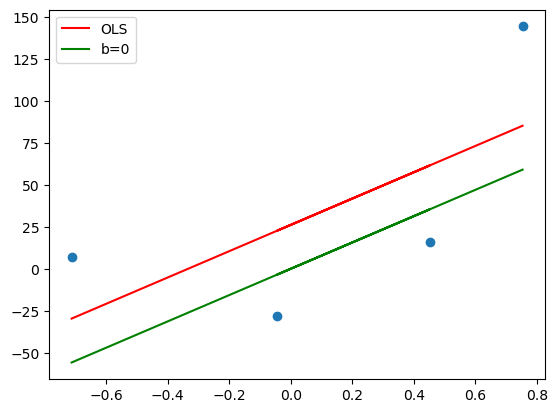

In [21]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x) , color ='red' , label='OLS')
plt.plot(x,y_pred, color ="green", label='b=0')
plt.legend()
plt.show()

# converts 2d data into 1d

In [23]:
import numpy as np

arr = np.array([[1,2,3],[4,5,6]])

#using ravel() function to flatten the array
flattened_arr=arr.ravel()

print(arr)
#Output :[[1 2 3]
#        [ 4,5,6]]

print(flattened_arr)
# output :[1,2,3,4,5,6]

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [27]:
m=78.35
b=0
loss_slope = -2*np.sum(y-m*x.ravel()-b)
loss_slope

-209.27763408209216

In [28]:
lr= 0.1
step_size= loss_slope*lr
step_size

-20.927763408209216

In [29]:
# Calculating the new intercept

b= b-step_size
b

20.927763408209216

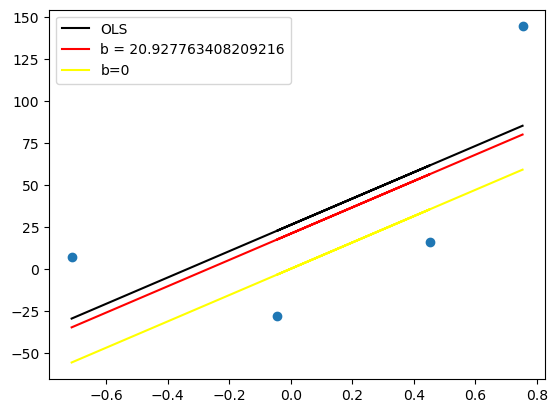

In [31]:
y_pred1 =((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x) , color ='black', label ='OLS')
plt.plot(x, y_pred1 , color='red', label ='b = {}'. format(b))
plt.plot(x,y_pred , color ='yellow' , label='b=0')
plt.legend()
plt.show()

In [34]:
#Iteration 2

loss_slope = -2*np.sum(y - m*x.ravel() - b)
loss_slope

-41.85552681641843

In [35]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [36]:
b = b-step_size
b

25.11331608985106

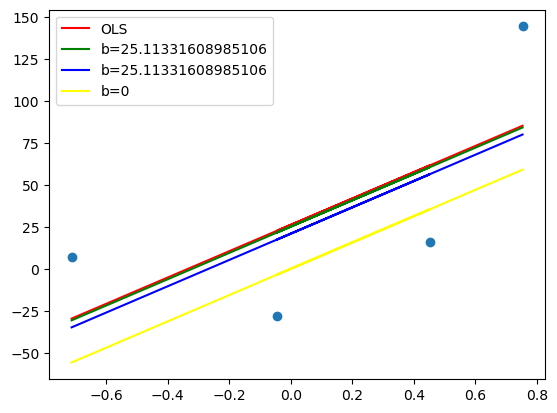

In [37]:
y_pred2 =((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x , reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred2 , color ='green' , label = 'b={}'.format(b))
plt.plot(x, y_pred1 , color ='blue' , label = 'b={}'.format(b))
plt.plot(x, y_pred , color ='yellow' , label = 'b=0')
plt.legend()
plt.show()


In [38]:
# Iteration 3 
loss_slope = -2 * np.sum(y-m*x.ravel() - b)
loss_slope

-8.371105363283675

In [41]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [42]:
b = b - step_size
b

25.95042662617943

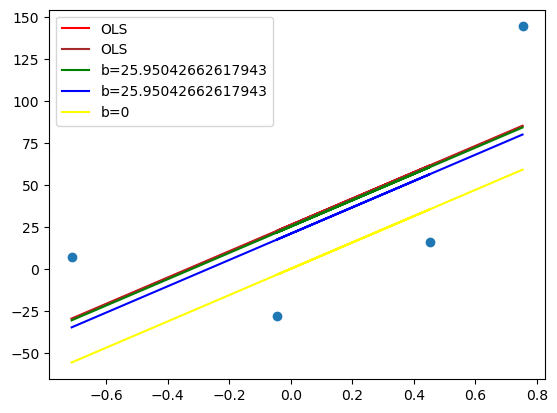

In [43]:
y_pred3 =((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred3 , color= 'brown' , label ='OLS')
plt.plot(x, y_pred2 , color ='green' , label = 'b={}'.format(b))
plt.plot(x, y_pred1 , color ='blue' , label = 'b={}'.format(b))
plt.plot(x, y_pred , color ='yellow' , label = 'b=0')
plt.legend()
plt.show()

# Now we use epochs

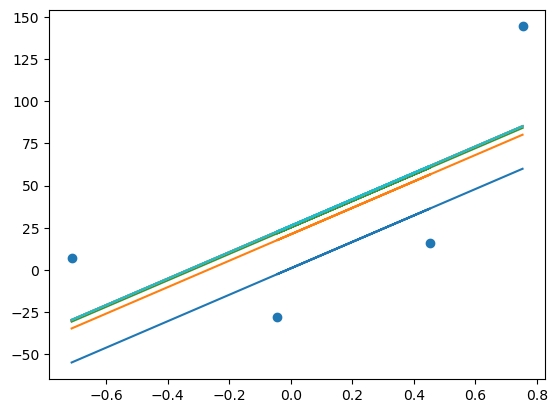

In [46]:
b= -100
m=78.35
lr=0.1

epochs = 10
for i in range(epochs):
    loss_slope = -2*np.sum(y- m*x.ravel()-b)
    b=b-(lr*loss_slope)
    
    y_pred = m*x+b
    plt.plot(x,y_pred)
    
plt.scatter(x,y)

# Now this time to check both on m and b

In [47]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [49]:
x,y = make_regression(n_samples = 100 , n_features =1 ,
                     n_informative = 1, n_targets = 1, noise = 20, random_state=13)

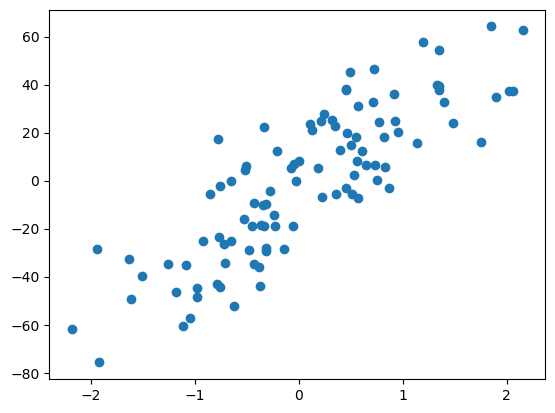

In [50]:
plt.scatter(x,y)

In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =2)

In [53]:
lr = LinearRegression()

In [55]:
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [58]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.6345158782661013

In [69]:
class GDRegressor:
    def __init__(self , learning_rate , epochs):
        self.m = 100
        self.b= -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, x,y):
#         calculate the b using gd
        for i in range(self. epochs):
            loss_slope_b = -2*np.sum(y- self.m*x.ravel()-self.b)
            loss_slope_m = -2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            
            
            self.b= self.b -(self.lr*loss_slope_b)
            self.m = self.m -(self.lr *loss_slope_m)
        print(self.b , self.m)
    
    def predict(self,x):
        return(self.m* x+self.b)

In [70]:
gd= GDRegressor(0.001 , 100)

In [71]:
gd.fit(x_train, y_train)

-2.2710234077993587 28.12598618006269


In [73]:
y_pred = gd.predict(x_test)
from sklearn.metrics import  r2_score
r2_score(y_test, y_pred)

0.634515826773629